# Programming for Data Science
## 2019/2020 Group Project
---
### G21 Members:


*   M20190546; Alex Anthony Panchot 
*   M20190201; Davide Montali 
*   M20190129; Gustavo de Souza Machado Fabricio

---

# Market Trends and Opportunities in the Travel Industry

## Overview

In this report we analyze and present a global overview of trends in the travel industry by retrieving knowledge and information from data. We make use of data provided by our client from World Bank Open Data [[link]](https://data.worldbank.org/) to perform our knowledge discovery. We supplement this with futher data sourced from World Bank Open Data, such as their World Development Indicators dataset. We include the various phases of our project in the file for the client to see the approaches used to work with the data. Firstly we prepare the data, by cleaning the datasets, merging the various data sets and providing a concise and reduced dataset with all the relevant data. We then perform some exploratory data and statistical analysis. Once we evaluate patterns, we present the discovered knowledge with interactive charts, which can be interactively changed depending on the insight the client seeks.

## Project Overview Index

* [Data Preparation](#Data-Preparation)
* [Transformation](#Transformation)
* [Statistics](#Statistics)
* [Pattern Evaluation](#Pattern-Evaluation)
* [Knowledge Presentation](#Knowledge-Presentation)

---

## Reqiurements

The below cell installs the python packages geopandas and descartes, which are used in the notebook to plot figures. We also set some settings in the pandas library, to ensure the notebook displays the same across different machines. We assume that the end-user already has the packages installed by default with conda. In case of issues, please see: https://www.anaconda.com/distribution/

Please run the requirements cell before moving on to other parts of the notebook, to ensure everything runs smoothly.


In [16]:
########## Requirements and Global Settings ##########

# Install pip packages not included by default in conda
import sys
!{sys.executable} -m pip install geopandas descartes

# Set Pandas settings, so the notebook displays the same across
# different computers. Setting precision to 2 for a cleaner view.

display_settings = {
    'max_columns': 10,
    'max_rows': 20,
    'precision': 2
}

for op, value in display_settings.items():
    pd.set_option("display.{}".format(op), value)

## Data Preparation

First we will import any necessary packages

In [17]:
# Import the various packages used in the notebook
# raise error if packages are missing, printing the
# missing packages

try:
    from statsmodels.graphics.gofplots import qqplot
    from numpy import random
    from scipy.cluster.vq import kmeans, vq
    from sklearn import preprocessing
    from ipywidgets import interact, interact_manual

    import pandas as pd
    import numpy as np
    import sklearn as sl
    import seaborn as sns
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    import geopandas as gpd
    import ipywidgets as widgets

    import os, requests, json
    import asda
    
except ImportError as e:
    print('IMPORT ERROR!\n\nERROR: Please note that some of the required packages were not',
          ' found. Please make sure you are using the correct Python environment',
          ' or make sure you install the missing packages!\n\n', 'ERROR MESSAGE: ',
           e, sep='')

IMPORT ERROR!

ERROR: Please note that some of the required packages were not found. Please make sure you are using the correct Python environment or make sure you install the missing packages!

ERROR MESSAGE: No module named 'asda'


### Importing the Data

We start by importing the data provided by the client, and included in our tar.gz directory, as well as the additional dataset World Development Indicators, both files are retrieved from the World Bank Open Data. Additionally we import a map of the world, which we use in the latter part of the notebook, to illustrate tourism trends on a global map.

To ensure the notebook retains usability cross-operating-systems, we use Python's os.path to avoid having hard-coded paths, which could break based on slashes or other OS differences.

In [30]:
# Set current working directory, to keep files accessible cross-OS
wd = os.getcwd()

####### Importing data #######
df = pd.read_csv((os.path.join(wd, 'API_ST.INT.ARVL_DS2_en_csv_v2_103871.csv')), skiprows=3)
df_md = pd.read_csv((os.path.join(wd, 'Metadata_Country_API_ST.INT.ARVL_DS2_en_csv_v2_103871.csv')))
df_extra = pd.read_csv((os.path.join(wd, 'WDIData.csv')))
world = gpd.read_file((os.path.join(wd, 'TM_WORLD_BORDERS_SIMPL-0.3.shp')))

Before performing any alterations to the data, we explore what data is contained in the main dataset by using the pandas .info() command.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 64 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              0 non-null float64
1974              0 non-null float64
1975              0 non-null float64
1976              0 non-null float64
1977              0 non-null float64
1978              0 non-null float64
1979              0 non-null float64
198

From the above printout, we can see that there are 264 rows. Therefore, all columns with fewer rows contain some null-values. Given that there are a number of columns wihout any data, we drop all columns with no values.

In [31]:
df.dropna(axis=1, how='all', inplace=True)

We verify that the expected columns have been dropped with the pandas .head() fucntion.

In [21]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1995,...,2013,2014,2015,2016,2017
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,619000.0,...,9.79e+05,1.07e+06,1.22e+06,1.10e+06,1.07e+06
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,...,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,9000.0,...,6.50e+05,5.95e+05,5.92e+05,3.97e+05,2.61e+05
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,304000.0,...,2.86e+06,3.34e+06,3.78e+06,4.07e+06,4.64e+06
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,NaN,...,2.33e+06,2.36e+06,2.66e+06,2.83e+06,NaN


It is clear that there are futher actions needed to clean the dataset given the number of NaN values. For instance, Afghanistan, has a NaN value in every year column. We will discuss the best way to circumvent the NaN data further down in the notebook. For now we take a first look at the supplemented World Bank dataset using .info() again.

In [22]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377784 entries, 0 to 377783
Data columns (total 65 columns):
Country Name      377784 non-null object
Country Code      377784 non-null object
Indicator Name    377784 non-null object
Indicator Code    377784 non-null object
1960              37966 non-null float64
1961              41852 non-null float64
1962              44056 non-null float64
1963              43970 non-null float64
1964              44510 non-null float64
1965              47109 non-null float64
1966              46797 non-null float64
1967              48537 non-null float64
1968              48124 non-null float64
1969              49736 non-null float64
1970              69962 non-null float64
1971              76274 non-null float64
1972              79075 non-null float64
1973              78660 non-null float64
1974              80044 non-null float64
1975              83987 non-null float64
1976              86104 non-null float64
1977              89550 non-

We clean up the extra dataframe by dropping the same columns as our main dataframe, and adding a mean value for each indicator based on the last 6 years.

In [32]:
df_extra = df_extra.dropna(axis=1, thresh=140000)
df_extra['data_inf'] = df_extra[["2012","2013","2014","2015", "2016", "2017"]].mean(axis=1)
df_extra.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1995,...,2014,2015,2016,2017,data_inf
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,...,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,...,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,...,83.90,84.17,84.51,NaN,83.85
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,...,87.34,89.13,89.68,90.27,88.61
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,54.94,...,75.54,78.74,79.67,80.75,77.85


We choose five indicators, which we identified as insightfull from the extra dataframe, and generate a pivot table. The pivot table allows us to display several indicators on a single row for each country. This will also allow us to merge it with the main dataframe further down the file. We rename the columns and then check for null values.

In [33]:
indicators = ["GNI per capita, Atlas method (current US$)", 
              "International tourism, receipts (current US$)",
              "International tourism, receipts (% of total exports)",
              "Current health expenditure per capita (current US$)",
              'Land area (sq. km)']

df_extra.rename(columns={"Indicator Name": "Indicator_Name"}, inplace = True)
df_extra = df_extra[df_extra['Indicator_Name'].isin(indicators)]

df_extra = pd.pivot_table(df_extra, values = 'data_inf', index = 'Country Name', columns = 'Indicator_Name').reset_index()

df_extra.rename(columns = {"GNI per capita, Atlas method (current US$)" : "GNI", 
              "International tourism, receipts (current US$)" : "ITR",
              "International tourism, receipts (% of total exports)" : "ITRP",
              "Current health expenditure per capita (current US$)" : "CHE",
              'Land area (sq. km)' : "LAR"}, inplace = True)

# Check for nulls
df_extra.isna().sum()

Indicator_Name
Country Name     0
CHE             29
GNI             22
ITRP            34
ITR             26
LAR              2
dtype: int64

In [25]:
df_extra

Indicator_Name,Country Name,CHE,GNI,ITRP,ITR,LAR
0,Afghanistan,57.13,606.67,6.69,1.07e+08,6.53e+05
1,Albania,274.73,4406.67,49.11,1.77e+09,2.74e+04
2,Algeria,314.59,4890.00,0.58,2.84e+08,2.38e+06
3,American Samoa,NaN,NaN,NaN,2.20e+07,2.00e+02
4,Andorra,3968.80,NaN,NaN,NaN,4.70e+02
...,...,...,...,...,...,...
258,West Bank and Gaza,NaN,3306.67,16.82,3.63e+08,6.02e+03
259,World,1020.12,10634.82,6.30,1.41e+12,1.27e+08
260,"Yemen, Rep.",76.00,1288.33,10.69,7.07e+08,5.28e+05
261,Zambia,67.33,1586.67,6.65,6.18e+08,7.43e+05


We merge the datasets to create a table with new variables, the 5 indicators and informations about income group and Region. With the variable Region we keep only countries in the main dataset. Thereafter we reorder the columns.

In [34]:
df = pd.merge(df, df_md[['Country Code', 'Region', 'IncomeGroup']], on='Country Code', how='left')
df = df.dropna(subset=['Region'], how='all')
df = pd.merge(df, df_extra[['Country Name','GNI', "ITR", "ITRP", "CHE", "LAR"]], on='Country Name', how='left')

df = df[['Country Name', 'Country Code', 'Region', 'IncomeGroup', '1995', 
 '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
 '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
 '2016', '2017', 'GNI', 'ITR', 'ITRP', 'CHE', 'LAR']]

df

,Country Name,Country Code,Region,IncomeGroup,1995,...,GNI,ITR,ITRP,CHE,LAR
0,Aruba,ABW,Latin America & Caribbean,High income,6.19e+05,...,23825.00,1.60e+09,64.59,NaN,1.80e+02
1,Afghanistan,AFG,South Asia,Low income,NaN,...,606.67,1.07e+08,6.69,57.13,6.53e+05
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,9.00e+03,...,4301.67,1.04e+09,2.25,120.32,1.25e+06
3,Albania,ALB,Europe & Central Asia,Upper middle income,3.04e+05,...,4406.67,1.77e+09,49.11,274.73,2.74e+04
4,Andorra,AND,Europe & Central Asia,High income,NaN,...,NaN,NaN,NaN,3968.80,4.70e+02
...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,Europe & Central Asia,Upper middle income,NaN,...,3915.00,NaN,NaN,NaN,1.09e+04
213,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,6.10e+04,...,1288.33,7.07e+08,10.69,76.00,5.28e+05
214,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,4.49e+06,...,6431.67,9.97e+09,9.47,503.01,1.21e+06
215,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1.63e+05,...,1586.67,6.18e+08,6.65,67.33,7.43e+05


Now we can look at dropping rows that have nulls. There is no straightforward way to drop the nulls as while some rows have all nulls (and therefore can be dropped without problem) some rows have only a few nulls. Deleting the whole row removes a lot of valid data as well. We will try to fill in single nulls later on, but now we will drop rows with at least 30% of the columns containing null values (considering 2006 until 2017). This ensures that at least most of the data is real and not created artifically. 


#### Dave comment I used thresh option in dropna, to replace the previous 8 lines of code with 1

In [94]:
# adjust % dropped by setting non-NaN values i.e. 1-0.3=0.7 (currently set)
df = df.dropna(thresh=round(df.shape[1]*.7)).reset_index(drop=True)

,Country Name,Country Code,Region,IncomeGroup,1995,1996,1997,...,2016,2017,GNI,ITR,ITRP,CHE,LAR
0,Aruba,ABW,Latin America & Caribbean,High income,6.19e+05,6.41e+05,6.50e+05,...,1.10e+06,1.07e+06,23825.00,1.60e+09,64.59,1113.49,1.80e+02
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,9.00e+03,2.10e+04,4.50e+04,...,3.97e+05,2.61e+05,4301.67,1.04e+09,2.25,120.32,1.25e+06
2,Albania,ALB,Europe & Central Asia,Upper middle income,3.04e+05,2.87e+05,1.19e+05,...,4.07e+06,4.64e+06,4406.67,1.77e+09,49.11,274.73,2.74e+04
3,Andorra,AND,Europe & Central Asia,High income,NaN,NaN,NaN,...,2.83e+06,NaN,38031.13,1.75e+10,9.11,3968.80,4.70e+02
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,2.29e+06,2.61e+06,2.76e+06,...,6.66e+06,6.72e+06,12508.33,5.44e+09,6.88,1141.90,2.74e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Samoa,WSM,East Asia & Pacific,Upper middle income,6.80e+04,7.30e+04,6.80e+04,...,1.34e+05,1.46e+05,4026.67,1.49e+08,61.78,234.34,2.83e+03
190,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,6.10e+04,7.40e+04,8.00e+04,...,NaN,NaN,1288.33,7.07e+08,10.69,76.00,5.28e+05
191,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,4.49e+06,4.92e+06,4.98e+06,...,1.00e+07,1.03e+07,6431.67,9.97e+09,9.47,503.01,1.21e+06
192,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1.63e+05,2.64e+05,3.41e+05,...,9.56e+05,1.08e+06,1586.67,6.18e+08,6.65,67.33,7.43e+05


## Transformation

We can fill in the null values in each of these indicators by taking means of each of the *region* and *income group* pairs and then using the mean for a country's applicable region and income group. At the end, we can remove these average columns from the dataset.

In [80]:
GNI_avg = df.groupby(by = ['Region', 'IncomeGroup'])['GNI'].mean().reset_index(name = "avg GNI")
ITR_avg = df.groupby(by = ['Region', 'IncomeGroup'])['ITR'].mean().reset_index(name = "avg ITR")
ITRP_avg = df.groupby(by = ['Region', 'IncomeGroup'])['ITRP'].mean().reset_index(name = "avg ITRP")
CHE_avg = df.groupby(by = ['Region', 'IncomeGroup'])['CHE'].mean().reset_index(name = "avg CHE")


df = pd.merge(df, GNI_avg[['Region', 'IncomeGroup', "avg GNI"]], on=['Region', 'IncomeGroup'], how='left')
df = pd.merge(df, ITR_avg[['Region', 'IncomeGroup', "avg ITR"]], on=['Region', 'IncomeGroup'], how='left')
df = pd.merge(df, ITRP_avg[['Region', 'IncomeGroup', "avg ITRP"]], on=['Region', 'IncomeGroup'], how='left')
df = pd.merge(df, CHE_avg[['Region', 'IncomeGroup', "avg CHE"]], on=['Region', 'IncomeGroup'], how='left')


df['GNI'].fillna(df['avg GNI'], inplace=True)
df['ITR'].fillna(df['avg ITR'], inplace=True)
df['ITRP'].fillna(df['avg ITRP'], inplace=True)
df['CHE'].fillna(df['avg CHE'], inplace=True)

df.drop(columns = ['avg GNI','avg ITR','avg ITRP','avg CHE'], inplace = True)

df.isna().sum()

Country Name     0
Country Code     0
Region           0
IncomeGroup      0
1995            18
                ..
GNI              0
ITR              0
ITRP             0
CHE              0
LAR              1
Length: 32, dtype: int64

As we can see there are now no null values for "GNI", "ITR", "ITRP", or "CHE". "LAR" has one null value, which we can manually fill in below.

In [81]:
#fill Sudan Area external information
df['LAR'].fillna(1886068, inplace=True)

In [82]:
df.head()

,Country Name,Country Code,Region,IncomeGroup,1995,1996,1997,...,2016,2017,GNI,ITR,ITRP,CHE,LAR
0,Aruba,ABW,Latin America & Caribbean,High income,6.19e+05,6.41e+05,6.50e+05,...,1.10e+06,1.07e+06,23825.00,1.60e+09,64.59,1113.49,1.80e+02
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,9.00e+03,2.10e+04,4.50e+04,...,3.97e+05,2.61e+05,4301.67,1.04e+09,2.25,120.32,1.25e+06
2,Albania,ALB,Europe & Central Asia,Upper middle income,3.04e+05,2.87e+05,1.19e+05,...,4.07e+06,4.64e+06,4406.67,1.77e+09,49.11,274.73,2.74e+04
3,Andorra,AND,Europe & Central Asia,High income,NaN,NaN,NaN,...,2.83e+06,NaN,38031.13,1.75e+10,9.11,3968.80,4.70e+02
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,2.29e+06,2.61e+06,2.76e+06,...,6.66e+06,6.72e+06,12508.33,5.44e+09,6.88,1141.90,2.74e+06


Looking at the data again, we can see that a few nans still exist in the dataset.

We can fill the null values of arrivals (columns 1995 to 2017) using interpolation by row, if we have null value in 2010 we fill it in by taking the values for 2009 and 2011 and dividing by 2. In the case of a sequence of null values, these values are repaced by taking the most recent values on either side of the group of null values and then interpolating. As we have dropped countries with more than 30% of null values, we do not have to worry about filling in too much artifical data.

Below we can plot two rows that contain null values before and after the interpolation. We will also save the database after the interpolation with a new name such that you can rerun the plots with different rows or different interpolation methods to see the difference.

In [83]:
tourism_interpolate =df.set_index("Country Name").iloc[:,3:26].interpolate(method='linear', axis=1, limit_direction='both').reset_index()
tourism_db=df.copy()
tourism_db.drop(columns = ['1995', 
 '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
 '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
 '2016', '2017'], inplace = True)

tourism_db = pd.merge(tourism_db, tourism_interpolate, on='Country Name', how='left')

tourism_db = tourism_db[['Country Name', 'Country Code', 'Region', 'IncomeGroup', '1995', 
 '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
 '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
 '2016', '2017', 'GNI', 'ITR', 'ITRP', 'CHE', 'LAR']]

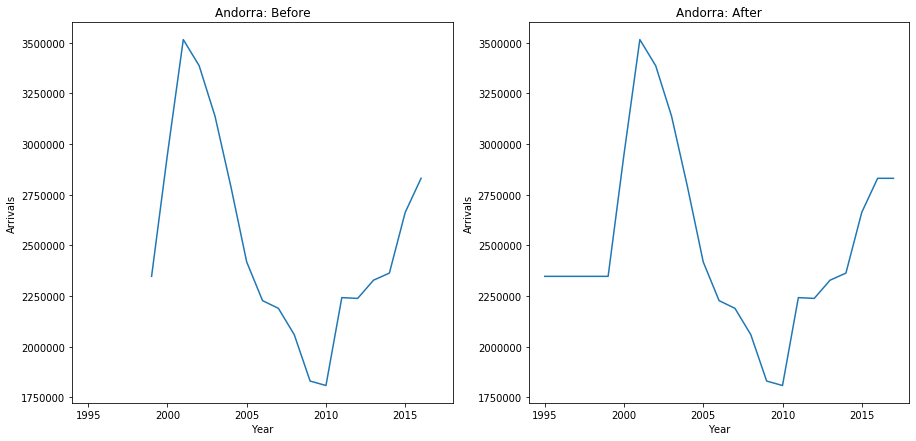

In [84]:
row = 3
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.xlim(1994,2018)
plt.xlabel("Year")
plt.ylabel("Arrivals")
plt.title(df.iloc[row,0]+": Before")
plt.plot(np.arange(1995,2018),df.iloc[row,4:27])


plt.subplot(122)
plt.xlim(1994,2018)
plt.xlabel("Year")
plt.ylabel("Arrivals")
plt.title(tourism_db.iloc[row,0]+": After")
plt.plot(np.arange(1995,2018),tourism_db.iloc[row,4:27])

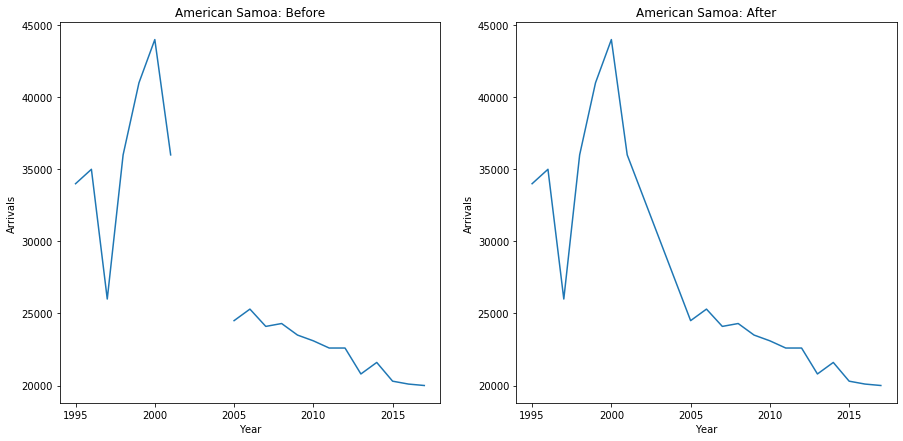

In [85]:
row = 6
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.xlim(1994,2018)
plt.xlabel("Year")
plt.ylabel("Arrivals")
plt.title(df.iloc[row,0]+": Before")
plt.plot(np.arange(1995,2018),df.iloc[row,4:27])


plt.subplot(122)
plt.xlim(1994,2018)
plt.xlabel("Year")
plt.ylabel("Arrivals")
plt.title(tourism_db.iloc[row,0]+": After")
plt.plot(np.arange(1995,2018),tourism_db.iloc[row,4:27])

Finally, let us check for nulls once more.

In [86]:
tourism_db.isna().sum()

Country Name    0
Country Code    0
Region          0
IncomeGroup     0
1995            0
               ..
GNI             0
ITR             0
ITRP            0
CHE             0
LAR             0
Length: 32, dtype: int64

## Statistics

This below section creates new variables related with the increase of arrivals over 2 years, 5 years, 10 years and 15 years. (2017 divided by the mean of that period). Also the arrivals per area is calculated in order to normilize the data such that small or medium physically sized countries with a relativily large number of arrivals can be seen.

In [87]:
tourism_db['inc_2y'] = tourism_db['2017']/tourism_db.iloc[:,24:26].mean(axis=1) - 1 
tourism_db['inc_5y'] = tourism_db['2017']/tourism_db.iloc[:,21:26].mean(axis=1) - 1
tourism_db['inc_10y'] = tourism_db['2017']/tourism_db.iloc[:,16:26].mean(axis=1) - 1
tourism_db['inc_15y'] = tourism_db['2017']/tourism_db.iloc[:,11:26].mean(axis=1) - 1
tourism_db['2017_ApA'] = tourism_db['2017']/tourism_db['LAR']

tourism_db.set_index('Country Name', inplace=True)

In order to quickly see any correlations between the introduced variables, we can look at a correlation matrix.

In [88]:
tourism_db1 = tourism_db.drop(tourism_db.columns[[range(3,25)]], axis=1) # we drop all of the columns except for the created columns
corr = tourism_db1.corr()
corr.style.background_gradient(cmap='coolwarm')

###Corr between GNI and CHE  = 0.92 drop CHE
###Corr between ITR and 2017 = 0.78 drop ITR 
###Drop inc_15y 
 
#tourism_db1.drop(tourism_db1.columns[[5,7,-2]], axis=1, inplace=True)



,2017,GNI,ITR,ITRP,CHE,LAR,inc_2y,inc_5y,inc_10y,inc_15y,2017_ApA
2017,1,0.28,0.78,-0.18,0.37,0.35,-0.01,0.022,0.0083,-0.023,0.048
GNI,0.28,1,0.37,-0.049,0.92,0.057,-0.057,-0.0069,-0.085,-0.15,0.22
ITR,0.78,0.37,1,-0.11,0.51,0.4,-0.045,-0.023,-0.037,-0.063,0.12
ITRP,-0.18,-0.049,-0.11,1,-0.12,-0.2,-0.13,-0.083,-0.084,-0.1,0.24
CHE,0.37,0.92,0.51,-0.12,1,0.13,-0.017,0.029,-0.055,-0.13,0.098
LAR,0.35,0.057,0.4,-0.2,0.13,1,-0.13,-0.11,-0.078,-0.078,-0.036
inc_2y,-0.01,-0.057,-0.045,-0.13,-0.017,-0.13,1,0.75,0.59,0.52,0.01
inc_5y,0.022,-0.0069,-0.023,-0.083,0.029,-0.11,0.75,1,0.89,0.78,-0.0078
inc_10y,0.0083,-0.085,-0.037,-0.084,-0.055,-0.078,0.59,0.89,1,0.97,-0.019
inc_15y,-0.023,-0.15,-0.063,-0.1,-0.13,-0.078,0.52,0.78,0.97,1,-0.021


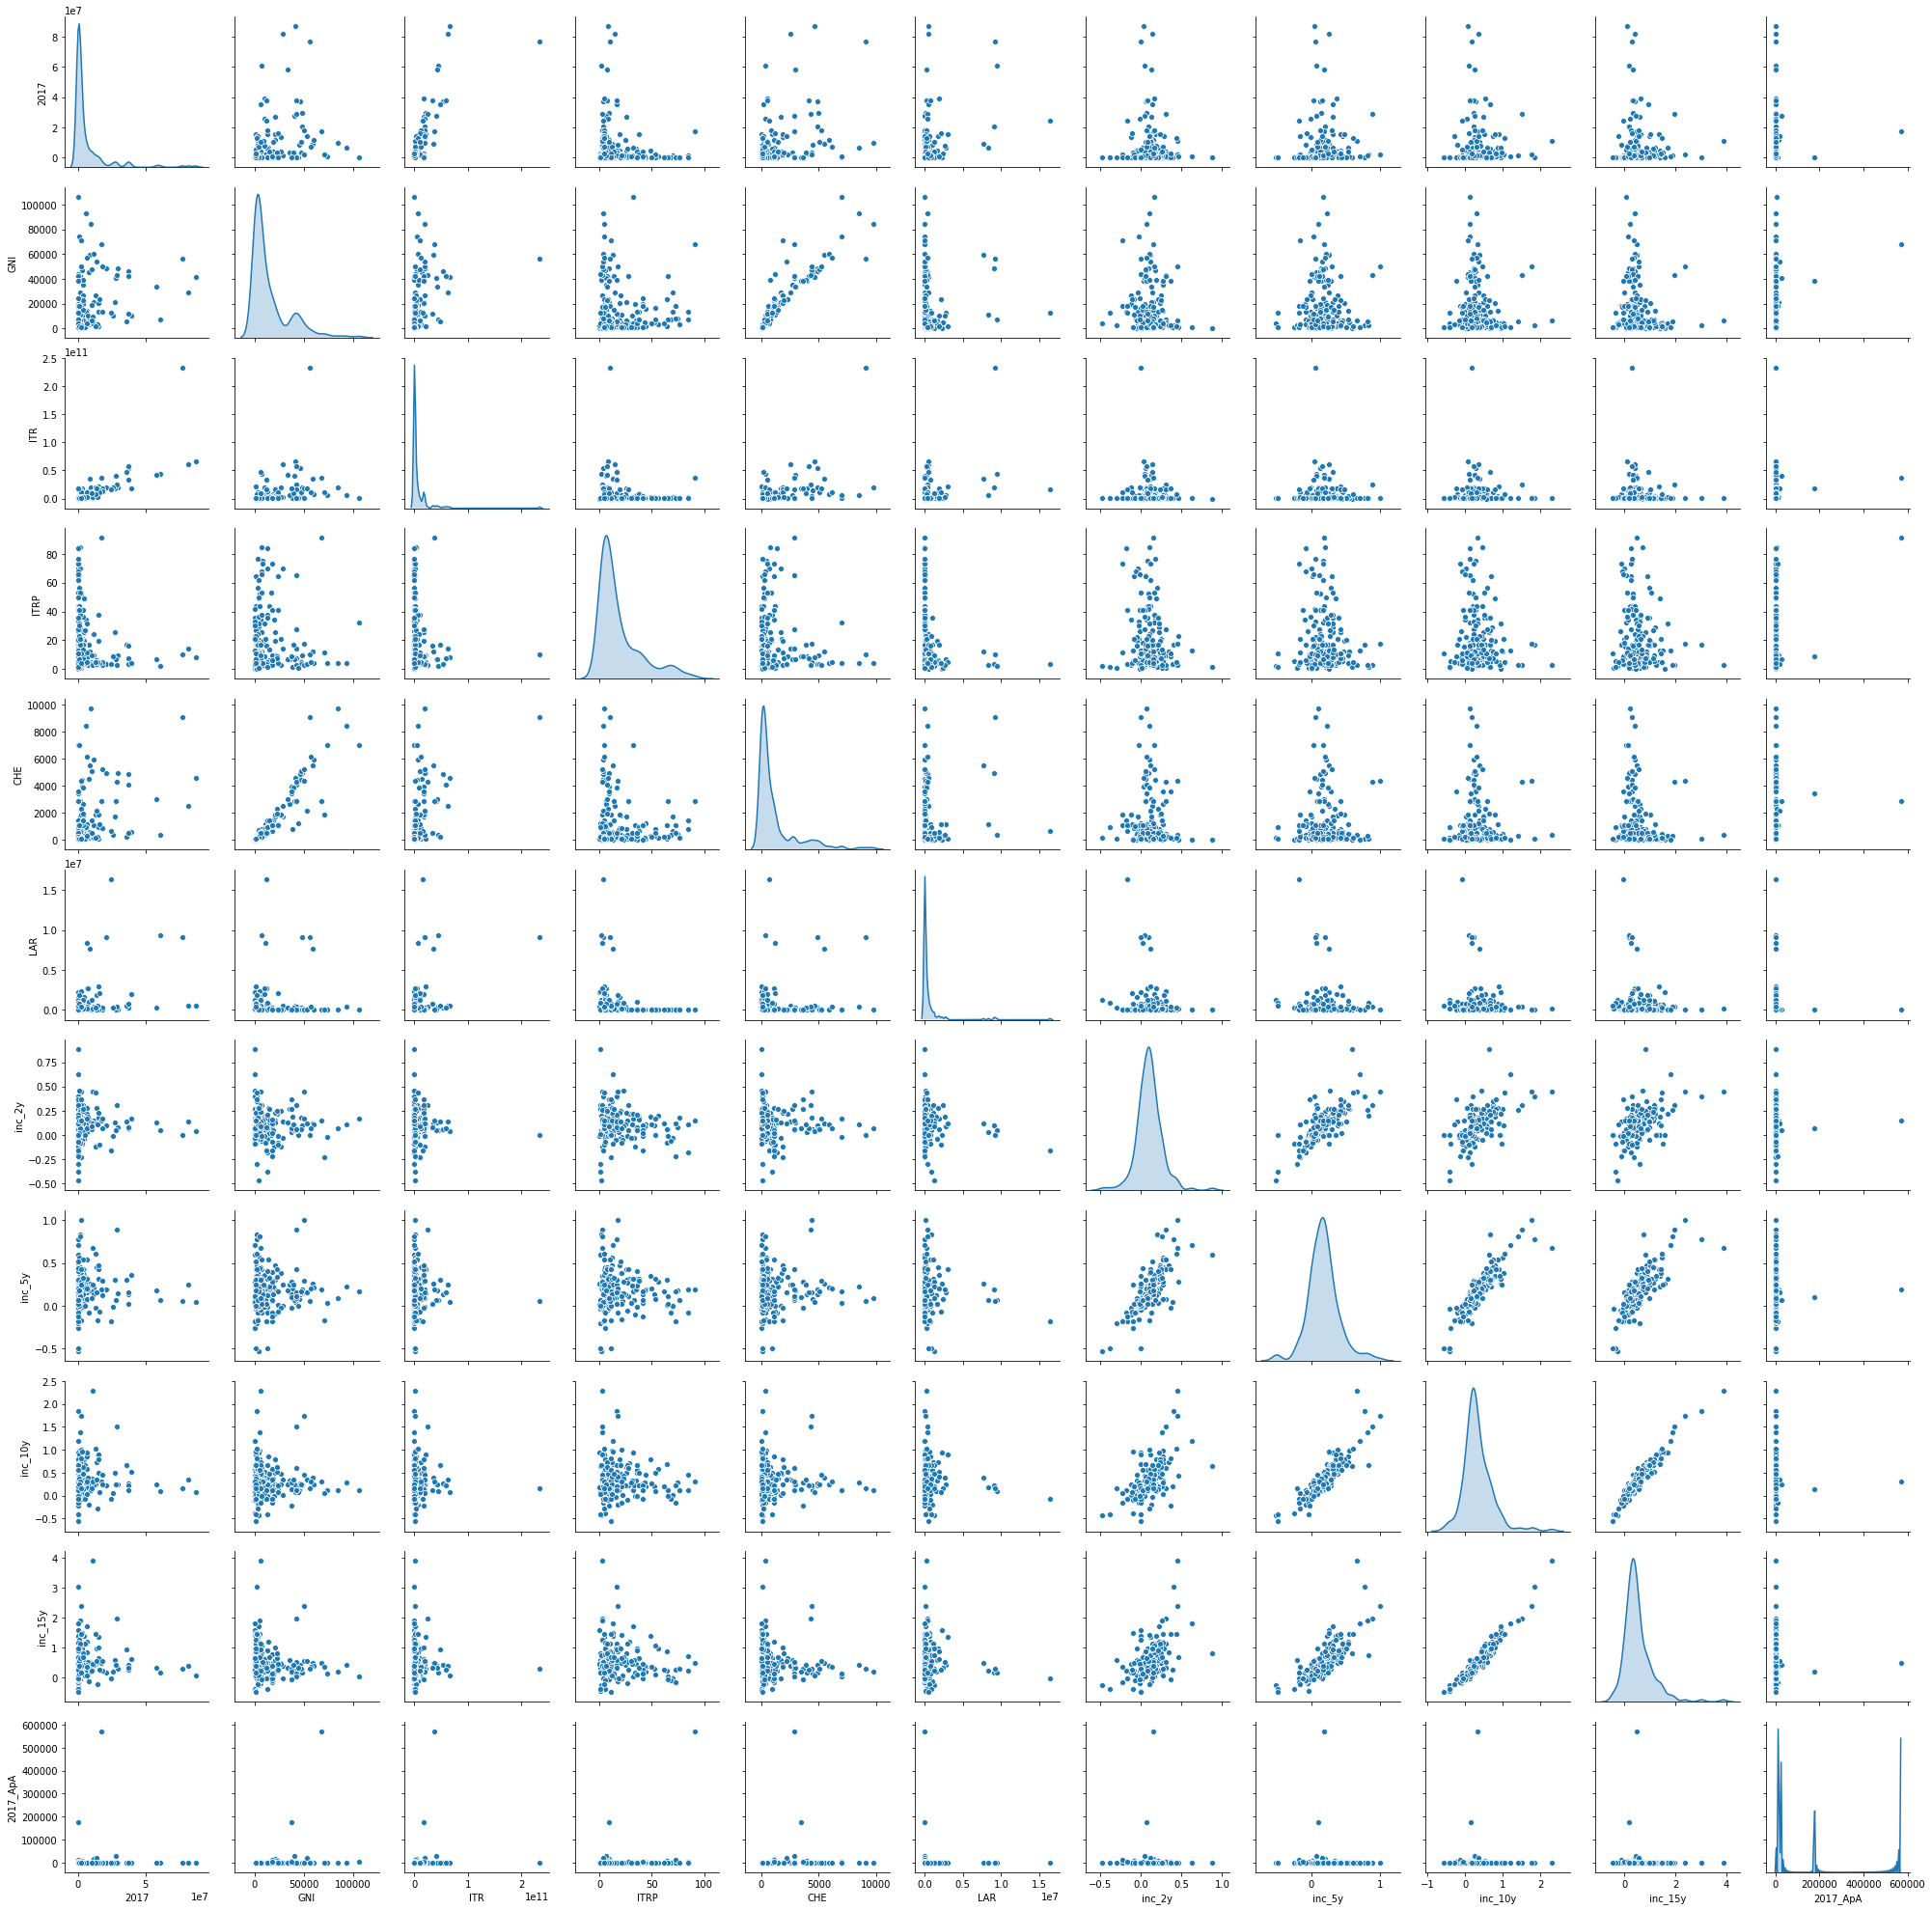

In [89]:
sns.pairplot(tourism_db1, diag_kind = "kde", kind = 'scatter')

Analyzing the correlation matrix an the correlation plot between the variables we can notice a strong correlation between GNI per capita (GNI) and Current health expenditure per capita (CHE) as well with between the 4 increasing tax. So the next step is do a cluster analysis to try to indentify groups of intersting countries. But before that, we need to check the distibution of our variables.

Plotting

In [90]:
@interact
def plt_distro(indicator=['2017','inc_10y','2017_ApA']):
    return sns.distplot(tourism_db1[indicator])

interactive(children=(Dropdown(description='indicator', options=('2017', 'inc_10y', '2017_ApA'), value='2017')…

As we can see, we don't have a normal distribution for our variables, so in order to transform this variables as close as possible to a normal distribution we dicide to do a log transformation 

In [27]:
@interact
def plt_distro(indicator=['2017','inc_10y','2017_ApA']):
    if indicator == 'inc_10y':
        return sns.distplot(np.log(tourism_db1[indicator]+1))
    else:
        return sns.distplot(np.log(tourism_db1[indicator]))

interactive(children=(Dropdown(description='indicator', options=('2017', 'inc_10y', '2017_ApA'), value='2017')…

our next step is verify outliers for the tree variables, if we identify a outlier we'll save in a different dataframe and classify later.

22.03477101604419
6.458170247206599
Empty DataFrame
Columns: [2017, 2017_log]
Index: []


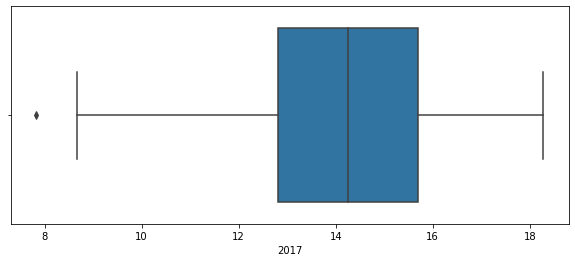

In [28]:
plt.figure(figsize=(10,4))
###Checking Outliers
#stats.probplot(np.log(tourism_db1['2017']), dist="norm", plot=plt)
sns.boxplot( y=np.log(tourism_db1['2017']), orient="h")

IQR = (np.log(tourism_db1['2017']).quantile(0.75) - np.log(tourism_db1['2017']).quantile(0.25))
LS = np.log(tourism_db1['2017']).quantile(0.75) + IQR*2.2
LI = np.log(tourism_db1['2017']).quantile(0.25) - IQR*2.2

print(LS)
print(LI)

OUTLS = tourism_db1[(np.log(tourism_db1['2017']) < LI) | (np.log(tourism_db1['2017']) > LS)].loc[:,['2017']]
OUTLS['2017_log'] = np.log(OUTLS['2017'])
print(OUTLS)


outliers = tourism_db1[tourism_db1.index.isin(OUTLS.index)]


                inc_10y  2017_log
Country Name                     
Angola        -0.422949 -0.549825
Bangladesh    -0.412870 -0.532509
Belarus        2.292373  1.191609
Bhutan         1.839644  1.043679
Cote d'Ivoire  2.393665  1.221911
Venezuela, RB -0.419758 -0.544310
Yemen, Rep.   -0.566953 -0.836909
              Country Code                      Region          IncomeGroup  \
Country Name                                                                  
Angola                 AGO          Sub-Saharan Africa  Lower middle income   
Bangladesh             BGD                  South Asia  Lower middle income   
Belarus                BLR       Europe & Central Asia  Upper middle income   
Bhutan                 BTN                  South Asia  Lower middle income   
Cote d'Ivoire          CIV          Sub-Saharan Africa  Lower middle income   
Venezuela, RB          VEN   Latin America & Caribbean  Upper middle income   
Yemen, Rep.            YEM  Middle East & North Africa        

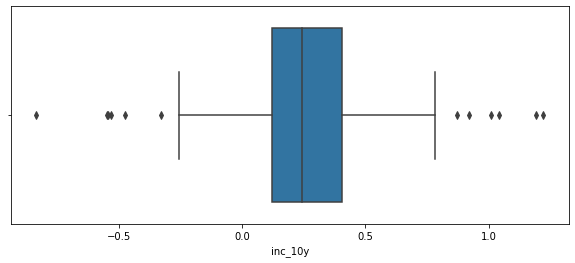

In [29]:
plt.figure(figsize=(10,4))
#stats.probplot(np.log(tourism_db1['inc_10y']+1), dist="norm", plot=plt)
sns.boxplot( y=np.log(tourism_db1['inc_10y']+1),  orient="h")


IQR = (np.log(tourism_db1['inc_10y']+1).quantile(0.75) - np.log(tourism_db1['inc_10y']+1).quantile(0.25))
LS = np.log(tourism_db1['inc_10y']+1).quantile(0.75) + IQR*2.2
LI = np.log(tourism_db1['inc_10y']+1).quantile(0.25) - IQR*2.2



OUTLS = tourism_db1[(np.log(tourism_db1['inc_10y']+1) < LI) | (np.log(tourism_db1['inc_10y']+1) > LS)].loc[:,['inc_10y']]
OUTLS['2017_log'] = np.log(OUTLS['inc_10y']+1)
print(OUTLS)

outliers = outliers.append(tourism_db1[tourism_db1.index.isin(OUTLS.index)])

print(outliers)

tourism_db1 = tourism_db1[~tourism_db1.index.isin(OUTLS.index)]


                       2017_ApA   2017_log
Country Name                              
Macao SAR, China  569785.365568  13.253015
                 Country Code                      Region  \
Country Name                                                
Angola                    AGO          Sub-Saharan Africa   
Bangladesh                BGD                  South Asia   
Belarus                   BLR       Europe & Central Asia   
Bhutan                    BTN                  South Asia   
Cote d'Ivoire             CIV          Sub-Saharan Africa   
Venezuela, RB             VEN   Latin America & Caribbean   
Yemen, Rep.               YEM  Middle East & North Africa   
Macao SAR, China          MAC         East Asia & Pacific   

                          IncomeGroup        2017           GNI           ITR  \
Country Name                                                                    
Angola            Lower middle income    261000.0   4301.666667  1.038667e+09   
Bangladesh       

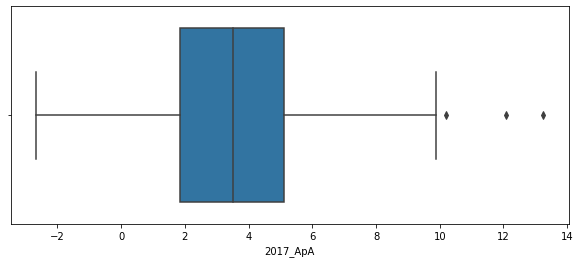

In [30]:
plt.figure(figsize=(10,4))
#stats.probplot(np.log(tourism_db1['2017_ApA']), dist="norm", plot=plt)
sns.boxplot(y=np.log(tourism_db1['2017_ApA']), orient="h")

IQR = (np.log(tourism_db1['2017_ApA']).quantile(0.75) - np.log(tourism_db1['2017_ApA']).quantile(0.25))
LS = np.log(tourism_db1['2017_ApA']).quantile(0.75) + IQR*2.2
LI = np.log(tourism_db1['2017_ApA']).quantile(0.25) - IQR*2.2

OUTLS = tourism_db1[(np.log(tourism_db1['2017_ApA']) < LI) | (np.log(tourism_db1['2017_ApA']) > LS)].loc[:,['2017_ApA']]
OUTLS['2017_log'] = np.log(OUTLS['2017_ApA'])
print(OUTLS)

outliers = outliers.append(tourism_db1[tourism_db1.index.isin(OUTLS.index)])

print(outliers)

tourism_db1 = tourism_db1[~tourism_db1.index.isin(OUTLS.index)]


After remove the outliers for the variables we standardize the data with minmax. after that the variables will be a value between 0 and 1 and than we can clusterize the data with the same weight for each variable

In [31]:
tourismScaled = pd.concat([np.log(tourism_db1['2017']), np.log(tourism_db1['inc_10y']+1), np.log(tourism_db1['2017_ApA'])], axis =1)

mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(tourismScaled)
tourismScaled = pd.DataFrame(mm_scaler.transform(tourismScaled), columns = ['scaled_2017','scaled_inc_10y', 'scaled_2017_ApA'], index = tourism_db1.index)


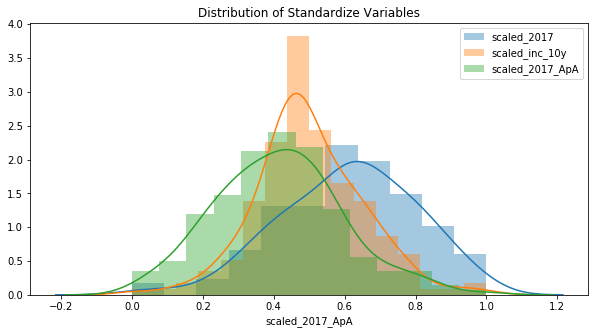

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(tourismScaled['scaled_2017']).set_title("Distribution of Standardize Variables")
sns.distplot(tourismScaled['scaled_inc_10y'])
sns.distplot(tourismScaled['scaled_2017_ApA'])
plt.legend(labels=['scaled_2017', 'scaled_inc_10y', 'scaled_2017_ApA'])

#stats.probplot(tourismScaled['scaled_2017'], dist="norm", plot=plt)
#stats.probplot(tourismScaled['scaled_inc_10y'], dist="norm", plot=plt)
#stats.probplot(tourismScaled['scaled_2017_ApA'], dist="norm", plot=plt)


#### Join the Scaled columns with the dataframe

In [33]:
tourism_db1 = pd.concat([tourism_db1, tourismScaled], axis=1)
#tourism_db1.head()

# Cluster

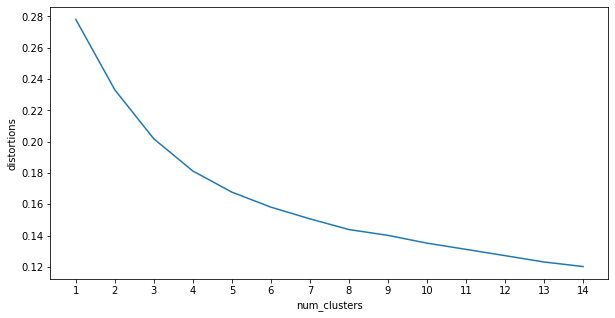

In [34]:
plt.figure(figsize=(10,5))
random.seed(2000)
#elbow grafic
distortions = []
num_clusters = range(1, 15)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(tourism_db1[["scaled_2017", 'scaled_inc_10y' ,'scaled_2017_ApA']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', markers=True, data = elbow_plot)
plt.xticks(num_clusters)
plt.show()


In [35]:
#didn't understood the value above "num_cluster"
#@interact
#def elbow(num_cluster=(1,14,1)):
#    sns.lineplot(x='num_clusters', y='distortions', markers=True, data = elbow_plot)
#    plt.xticks(num_clusters)
#    plt.axhline(elbow_plot.iloc[num_cluster-1,1])
#    plt.axvline(elbow_plot.iloc[num_cluster-1,0])
#    print(elbow_plot.iloc[num_cluster-1,1]/0.4+elbow_plot.iloc[num_cluster-1,0]/14)
#    plt.show()

In [36]:
random.seed(2000)

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(tourism_db1[["scaled_2017", 'scaled_inc_10y', 'scaled_2017_ApA']], 6)

# Assign cluster labels1
tourism_db1['cluster_labels'], _ = vq(tourism_db1[["scaled_2017", 'scaled_inc_10y', 'scaled_2017_ApA']], cluster_centers)

# Display cluster centers 
center = tourism_db1[["scaled_2017", 'scaled_inc_10y', 'scaled_2017_ApA','cluster_labels']].groupby('cluster_labels').mean()
centerRV = tourism_db1[["2017", 'inc_10y', '2017_ApA','cluster_labels']].groupby('cluster_labels').mean()

centerRV

,2017,inc_10y,2017_ApA
cluster_labels,,,
0,2.617262e+07,0.240022,125.918477
1,3.047407e+06,0.225877,10571.489064
2,2.851720e+05,0.359435,1.596834
3,5.195200e+06,0.827390,46.502103
4,1.305826e+05,0.121519,196.931254
5,2.808893e+06,0.237812,17.816522


Now we have six different cluster and we will analyse then and put a label for each cluester.

Cluster 0 - Contains coutries with most arrivals in the world, ther arrivals are incresing above the world
Cluster 1 - Contains small and medium coutries and some touristics islands with 3MM arrivals in 2017 at avarage and 10.5k               arrivals per KM².
Cluster 2 - Contains countries with low number of arrivals in 2017 (285k) and they grow at the same rate as the world.
Cluster 3 - Contains countries with 5MM of arrivals at the average and a growth rate of 83% (2017 compare with the average             of the last 10yrs)
Cluster 4 - Countries with the lowest growth rate, only 12% a 130k of arrivals in 2017
Cluster 5 - Countries with 2.8MM arrivals in 2017 with a growth rate above the world 

Cluster 0 = Top World
Cluster 1 = Touristic Islands and Countries
Cluster 2 = Low intrest for tourism Countries 
Cluster 3 = Rising Countries for Tourism
Cluster 4 = Non intrest for tourism Countries
Cluster 5 = Medium intrest for tourism Countries 

In [37]:
cluster = {'cluster_labels' : [0,1,2,3,4,5], 
           'cluster_names' : ['1- Top World',
                              '3- Touristic Islands and Countries', 
                              '5- Low interest for tourism Countries', 
                              '2- Rising Countries for Tourism', 
                              '6- Non interest for tourism Countries', 
                              '4- Medium interest for tourism Countries']}

cluster_names  = pd.DataFrame(cluster)

tourism_db1.reset_index(inplace = True)

tourism_db1 = pd.merge(cluster_names,tourism_db1, 
                       on='cluster_labels', 
                       how='outer').set_index('Country Name').drop(columns = 'cluster_labels')

Now we classify the outliers and select the best group for them.

1 - So "Bhutan" , "Cote d'Ivoire", "Belarus" as select as outliers becouse their growth rate are bigger then the others countries, so they will compose the Cluster 3 = Rising Countries for Tourism
2 - on the other side "Angola", Bangladesh, "Venezuela, RB", "Yemen, Rep." was considered outliers becouse ther growth rate is lower compared to the others, so they will compose Cluster 4 = Non intrest for tourism Countries

and "Macao SAR, China" has a big number of arrivals per KM², so this country will belong to Cluster 1 = Touristic Islands and Countries.



In [38]:
outlabels = {'Country Code' : ['BLR', 'BTN', 'CIV', 'AGO', 'BGD', 'VEN', 'YEM','MAC'], 
           'cluster_names' : ['2- Rising Countries for Tourism', 
                              '2- Rising Countries for Tourism',
                              '2- Rising Countries for Tourism',
                              '6- Non interest for tourism Countries',
                              '6- Non interest for tourism Countries',
                              '6- Non interest for tourism Countries',
                              '6- Non interest for tourism Countries',
                              '3- Touristic Islands and Countries']}


outlabels  = pd.DataFrame(outlabels)

outliers.reset_index(inplace = True)

outliers  = pd.merge(outlabels , outliers , on='Country Code', how='outer').set_index('Country Name')


tourism_db1 = pd.concat([tourism_db1, outliers], axis = 0, sort=False)


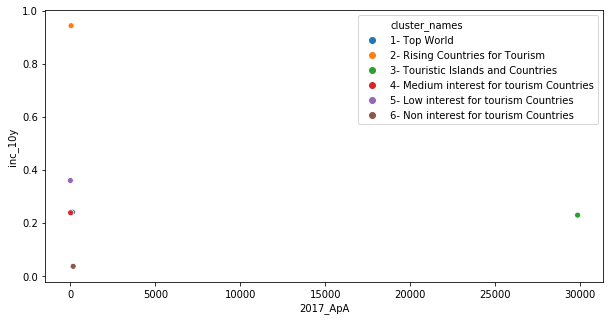

In [39]:
plt.figure(figsize=(10,5))
df_plot = tourism_db1[["2017", 'inc_10y', '2017_ApA','cluster_names']].groupby('cluster_names').mean().reset_index()
sns.scatterplot(x="2017_ApA", y="inc_10y", hue="cluster_names", data=df_plot)

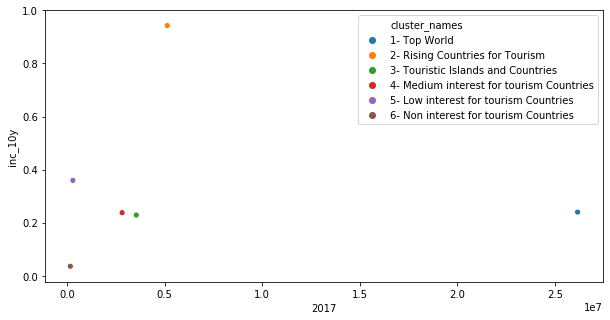

In [40]:
plt.figure(figsize=(10,5))
df_plot = tourism_db1[["2017", 'inc_10y', '2017_ApA','cluster_names']].groupby('cluster_names').mean().reset_index()
sns.scatterplot(x="2017", y="inc_10y", hue="cluster_names", data=df_plot)

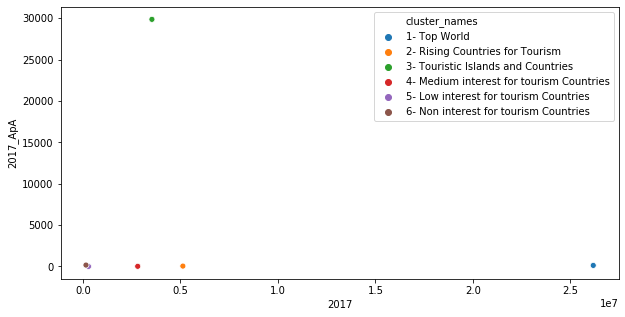

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="2017", y="2017_ApA", hue="cluster_names", data=df_plot)

In [42]:
df_plot

,cluster_names,2017,inc_10y,2017_ApA
0,1- Top World,2.617262e+07,0.240022,125.918477
1,2- Rising Countries for Tourism,5.124617e+06,0.942919,44.426034
2,3- Touristic Islands and Countries,3.537324e+06,0.228946,29854.726185
3,4- Medium interest for tourism Countries,2.808893e+06,0.237812,17.816522
4,5- Low interest for tourism Countries,2.851720e+05,0.359435,1.596834
5,6- Non interest for tourism Countries,1.549296e+05,0.036015,167.843227


In [43]:
tourism_db1

,cluster_names,Country Code,Region,IncomeGroup,2017,GNI,ITR,ITRP,CHE,LAR,inc_2y,inc_5y,inc_10y,inc_15y,2017_ApA,scaled_2017,scaled_inc_10y,scaled_2017_ApA
Country Name,,,,,,,,,,,,,,,,,,
Austria,1- Top World,AUT,Europe & Central Asia,High income,29460000.0,48351.666667,2.064317e+10,9.440953,4975.592257,8.252950e+04,0.074222,0.140941,0.236864,0.317268,356.963273,0.896586,0.463227,0.579303
Belgium,1- Top World,BEL,Europe & Central Asia,High income,8385000.0,45081.666667,1.383517e+10,3.390460,4499.394587,3.028000e+04,0.058980,0.075910,0.122911,0.158853,276.915456,0.776404,0.398255,0.562098
Bulgaria,1- Top World,BGR,Europe & Central Asia,Upper middle income,8883000.0,7610.000000,4.221333e+09,11.989854,602.124339,1.085600e+05,0.157319,0.230298,0.363553,0.527128,81.825718,0.781922,0.528776,0.479497
Canada,1- Top World,CAN,North America,High income,20798000.0,48436.666667,2.003117e+10,3.814974,4929.343143,9.093510e+06,0.096305,0.196911,0.223923,0.183044,2.287126,0.863286,0.456157,0.237117
Switzerland,1- Top World,CHE,Europe & Central Asia,High income,9889000.0,84500.000000,2.006217e+10,4.514284,9726.939237,3.951600e+04,0.068504,0.093892,0.127427,0.205167,250.253056,0.792183,0.400953,0.555239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Angola,6- Non interest for tourism Countries,AGO,Sub-Saharan Africa,Lower middle income,261000.0,4301.666667,1.038667e+09,2.250076,120.319898,1.246700e+06,-0.472194,-0.527516,-0.422949,-0.253717,0.209353,NaN,NaN,NaN
Bangladesh,6- Non interest for tourism Countries,BGD,South Asia,Lower middle income,125000.0,1205.000000,1.831000e+08,0.522922,28.700219,1.301700e+05,0.000000,-0.035494,-0.412870,-0.424847,0.960283,NaN,NaN,NaN
"Venezuela, RB",6- Non interest for tourism Countries,VEN,Latin America & Caribbean,Upper middle income,427000.0,12586.666667,7.860000e+08,1.335936,953.505086,8.820500e+05,-0.385612,-0.494196,-0.419758,-0.363826,0.484100,NaN,NaN,NaN


In [44]:
#Its not working with the new cluster names. try to do 2017 X inc_10y , 2017 X 2017_ApA and inc_10y X 2017_ApA

@interact
def clusterplot(xaxis=["2017"], yaxis=["inc_10y","2017_ApA"],cluster_points=widgets.SelectMultiple(options=[i for i in df_plot['cluster_names']],description='Clusters',disabled=False)):
    plt.figure(figsize=(10,10))   
#    plt.xlim(-0.1,1.1)
 #   plt.ylim(-0.1,1.1)
    sns.scatterplot(x=xaxis, y=yaxis, hue="cluster_names", data=tourism_db1.loc[tourism_db1['cluster_names'].isin(cluster_points)])
    plt.show()

interactive(children=(Dropdown(description='xaxis', options=('2017',), value='2017'), Dropdown(description='ya…

In [45]:
df_map = tourism_db1.loc[:,["Country Code", "cluster_names"]]

df_map  = pd.merge(world , df_map ,left_on="ISO3", right_on='Country Code',  how='outer')

df_map.cluster_names.fillna("NA", inplace = True)


In [46]:
df_map

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry,Country Code,cluster_names
0,AC,AG,ATG,28.0,Antigua and Barbuda,44.0,83039.0,19.0,29.0,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ...",ATG,6- Non interest for tourism Countries
1,AG,DZ,DZA,12.0,Algeria,238174.0,32854159.0,2.0,15.0,2.632,28.163,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ...",DZA,4- Medium interest for tourism Countries
2,AJ,AZ,AZE,31.0,Azerbaijan,8260.0,8352021.0,142.0,145.0,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39...",AZE,2- Rising Countries for Tourism
3,AL,AL,ALB,8.0,Albania,2740.0,3153731.0,150.0,39.0,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.60056 41.79666...",ALB,2- Rising Countries for Tourism
4,AM,AM,ARM,51.0,Armenia,2820.0,3017661.0,142.0,145.0,44.563,40.534,"POLYGON ((45.15387 41.19860, 46.00194 40.22555...",ARM,2- Rising Countries for Tourism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,JE,JE,JEY,832.0,Jersey,0.0,0.0,150.0,154.0,-2.129,49.219,"POLYGON ((-2.01500 49.21416, -2.20528 49.18083...",NaN,NA
244,SX,GS,SGS,239.0,South Georgia South Sandwich Islands,0.0,0.0,0.0,0.0,-36.891,-54.209,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...",NaN,NA
245,TW,TW,TWN,158.0,Taiwan,0.0,0.0,0.0,0.0,120.946,23.754,"MULTIPOLYGON (((121.57639 22.00139, 121.49026 ...",NaN,NA
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,CUW,3- Touristic Islands and Countries


In [47]:
list(tourism_db1.loc[tourism_db1['Region'].isin(['High income']),'Country Code'])

[]

In [48]:
tourism_db1

,cluster_names,Country Code,Region,IncomeGroup,2017,GNI,ITR,ITRP,CHE,LAR,inc_2y,inc_5y,inc_10y,inc_15y,2017_ApA,scaled_2017,scaled_inc_10y,scaled_2017_ApA
Country Name,,,,,,,,,,,,,,,,,,
Austria,1- Top World,AUT,Europe & Central Asia,High income,29460000.0,48351.666667,2.064317e+10,9.440953,4975.592257,8.252950e+04,0.074222,0.140941,0.236864,0.317268,356.963273,0.896586,0.463227,0.579303
Belgium,1- Top World,BEL,Europe & Central Asia,High income,8385000.0,45081.666667,1.383517e+10,3.390460,4499.394587,3.028000e+04,0.058980,0.075910,0.122911,0.158853,276.915456,0.776404,0.398255,0.562098
Bulgaria,1- Top World,BGR,Europe & Central Asia,Upper middle income,8883000.0,7610.000000,4.221333e+09,11.989854,602.124339,1.085600e+05,0.157319,0.230298,0.363553,0.527128,81.825718,0.781922,0.528776,0.479497
Canada,1- Top World,CAN,North America,High income,20798000.0,48436.666667,2.003117e+10,3.814974,4929.343143,9.093510e+06,0.096305,0.196911,0.223923,0.183044,2.287126,0.863286,0.456157,0.237117
Switzerland,1- Top World,CHE,Europe & Central Asia,High income,9889000.0,84500.000000,2.006217e+10,4.514284,9726.939237,3.951600e+04,0.068504,0.093892,0.127427,0.205167,250.253056,0.792183,0.400953,0.555239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Angola,6- Non interest for tourism Countries,AGO,Sub-Saharan Africa,Lower middle income,261000.0,4301.666667,1.038667e+09,2.250076,120.319898,1.246700e+06,-0.472194,-0.527516,-0.422949,-0.253717,0.209353,NaN,NaN,NaN
Bangladesh,6- Non interest for tourism Countries,BGD,South Asia,Lower middle income,125000.0,1205.000000,1.831000e+08,0.522922,28.700219,1.301700e+05,0.000000,-0.035494,-0.412870,-0.424847,0.960283,NaN,NaN,NaN
"Venezuela, RB",6- Non interest for tourism Countries,VEN,Latin America & Caribbean,Upper middle income,427000.0,12586.666667,7.860000e+08,1.335936,953.505086,8.820500e+05,-0.385612,-0.494196,-0.419758,-0.363826,0.484100,NaN,NaN,NaN


In [52]:
@interact
def map(cluster_points=widgets.SelectMultiple(options=[i for i in df_plot['cluster_names']],description='Clusters',disabled=False), 
        regions=widgets.SelectMultiple(options=['Europe & Central Asia','North America','Sub-Saharan Africa','South Asia','Latin America & Caribbean','East Asia & Pacific','Middle East & North Africa'],description='Regions',disabled=False),
        incomegrp=widgets.SelectMultiple(options=['Low income','Lower middle income','Upper middle income','High income'],description='Income Groups',disabled=False),
       dis_list=widgets.ToggleButton(value=False, description='Click me', disabled=False, button_style='info', tooltip='Description',icon='check')):
    
    fig, ax = plt.subplots(figsize  = (20, 20))
    plt.xlim(-180,180) # measured in degrees
    plt.ylim(-180,180)
    df_map.plot(color='silver',edgecolor='gray', ax = ax)
    df_map.loc[df_map['cluster_names'].isin(cluster_points) &
               df_map['Country Code'].isin(list(tourism_db1.loc[tourism_db1['Region'].isin(regions),'Country Code'])) &
               df_map['Country Code'].isin(list(tourism_db1.loc[tourism_db1['IncomeGroup'].isin(incomegrp),'Country Code'])),:].plot(cmap = 'Paired',legend = True, legend_kwds={'loc': 'upper left'}, column = 'cluster_names', edgecolor='gray', ax = ax)
    ax.set_axis_off()
    plt.show()
    
    if dis_list==True:
        print((tourism_db1.loc[tourism_db1['cluster_names'].isin(cluster_points) &
                               tourism_db1['Country Code'].isin(list(tourism_db1.loc[tourism_db1['Region'].isin(regions),'Country Code'])) &
                               tourism_db1['Country Code'].isin(list(tourism_db1.loc[tourism_db1['IncomeGroup'].isin(incomegrp),'Country Code'])),['Region','IncomeGroup']]))



interactive(children=(SelectMultiple(description='Clusters', options=('1- Top World', '2- Rising Countries for…

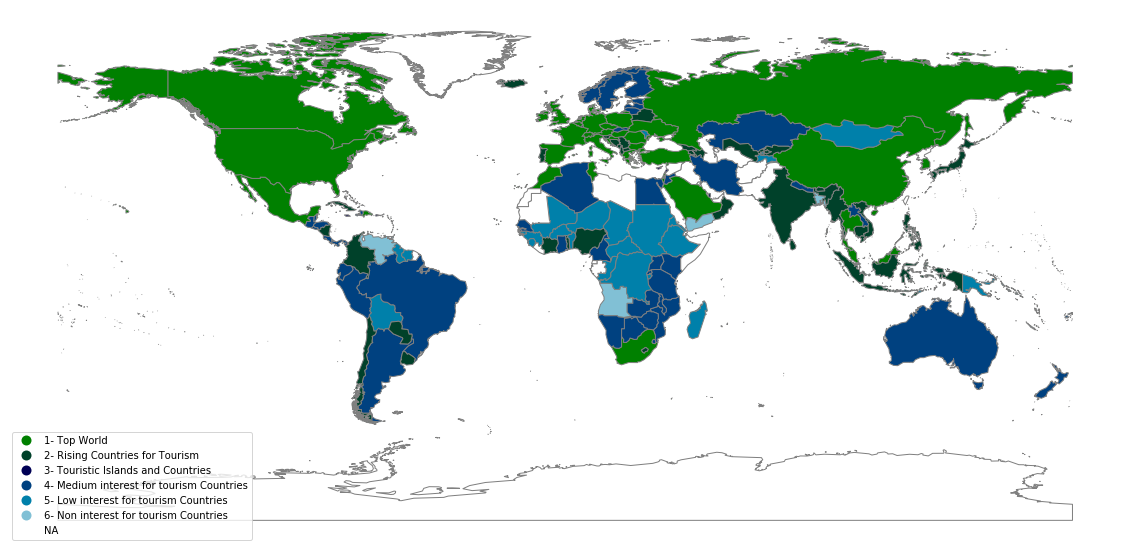

In [53]:
fig, ax = plt.subplots(figsize  = (20, 20))
df_map.plot(cmap = 'ocean', legend = True, legend_kwds={'loc': 'lower left'}, column = 'cluster_names', edgecolor='gray', ax = ax)
ax.set_axis_off()


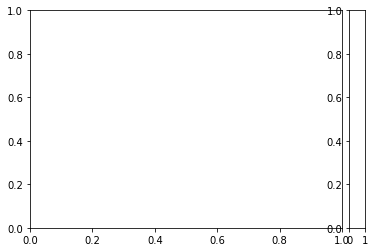

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)


